2025-07-16 00:11:54.558413: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752635514.593181  704035 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752635514.606670  704035 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752635514.633145  704035 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752635514.633167  704035 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752635514.633169  704035 computation_placer.cc:177] computation placer alr

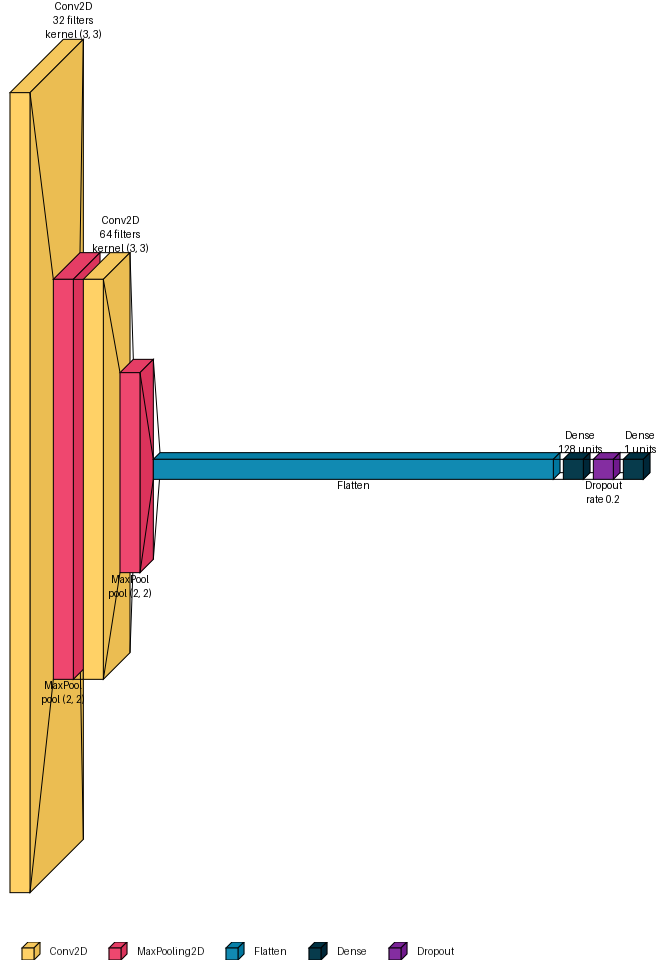

In [1]:
import visualkeras
from PIL import ImageFont
import tensorflow as tf
from keras import layers, models
import keras


def create_ball_angle_cnn(input_channels=1, input_height=40, input_width=200):
    # Create the model
    model = models.Sequential()

    # First convolutional block
    model.add(layers.Conv2D(32, kernel_size=3, strides=1, padding='same',
                            activation='relu', input_shape=(input_height, input_width, input_channels)))
    model.add(layers.MaxPooling2D(pool_size=2, strides=2))

    # Second convolutional block
    model.add(layers.Conv2D(64, kernel_size=3, strides=1,
              padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=2, strides=2))

    # Flatten and dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1))

    return model


def text_callable(layer_idx, layer):
    """
    Custom text callable function for visualkeras.layered_view()

    Args:
        layer_idx: Index of the layer in the model (ignoring certain layers)
        layer: The actual layer object

    Returns:
        tuple: (text_to_display, draw_above)
               text_to_display: String to show for this layer
               draw_above: Boolean whether to draw text above the layer box
    """
    # Default values
    text = layer.name
    draw_above = False  # Default to drawing below

    # Customize text based on layer type
    if isinstance(layer, keras.layers.Conv2D):
        text = f"Conv2D\n{layer.filters} filters\nkernel {layer.kernel_size}"
        draw_above = True
    elif isinstance(layer, keras.layers.MaxPooling2D):
        text = f"MaxPool\npool {layer.pool_size}"
    elif isinstance(layer, keras.layers.Dense):
        text = f"Dense\n{layer.units} units"
        draw_above = True
    elif isinstance(layer, keras.layers.Dropout):
        text = f"Dropout\nrate {layer.rate}"
    elif isinstance(layer, keras.layers.Flatten):
        text = "Flatten"

    return text, draw_above


# Example usage:

# Create your model
model = create_ball_angle_cnn(input_channels=1)

# Create a proper font object
try:
    # Try to load arial font
    font = ImageFont.truetype("arial.ttf", 12)
except:
    # Fallback to default font
    font = ImageFont.load_default()

# Visualize with custom text
visualkeras.layered_view(
    model,
    text_callable=text_callable,
    legend=True,
    font_color='black'
)
